YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


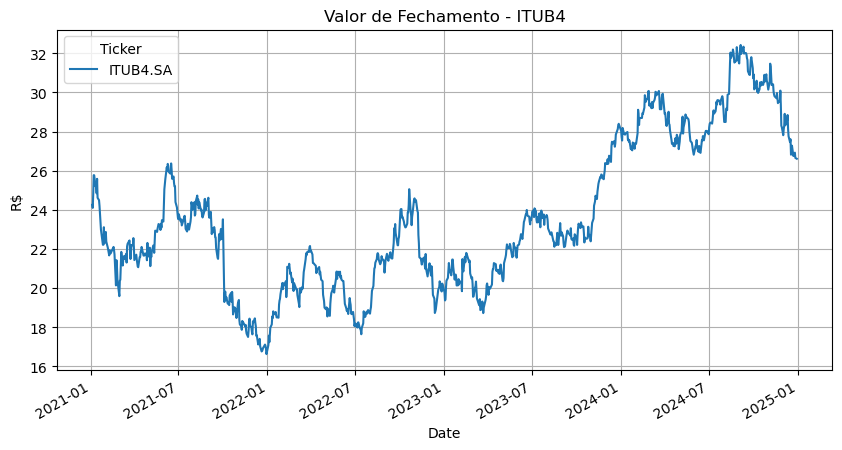

C:\Users\Neto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Neto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Neto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Neto\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

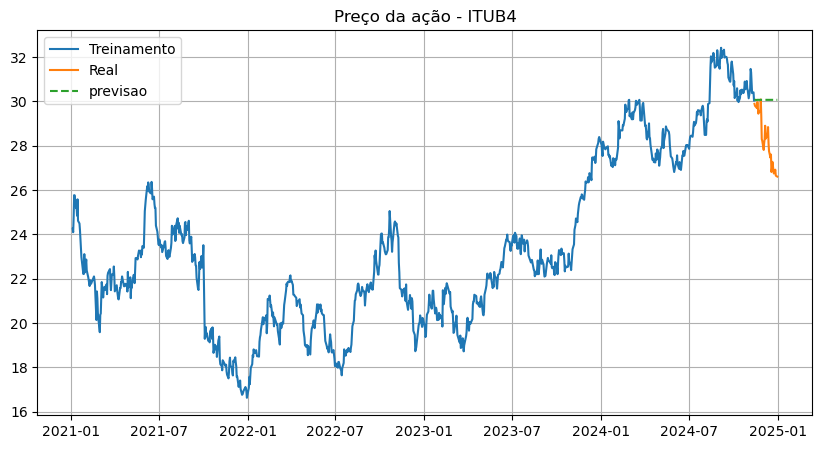

ValueError: Format specifier missing precision

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import yfinance as yf 
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error


# Baixar dados do itau (itaub4) dos ultimos 3 anos
dados = yf.download('ITUB4.SA' , start='2021-01-01' , end ='2024-12-31')

if dados.empty:
    print("Nenhum dado encontrado, verifique a conexão !")
else:
    # vizualização dos dados 
    dados['Close'].plot(figsize=(10,5), title='Valor de Fechamento - ITUB4')
    plt.ylabel('R$')
    plt.grid(True)
    plt.show();

# Treinando o Modelo ARIMA 
serie = dados['Close'].dropna()
train = serie[:-30]
teste = serie[-30:]

modelo = ARIMA(train, order=(5,1,0))
resultado = modelo.fit()

# Fazendo a previsão
previsao = resultado.forecast(steps=30)

plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Treinamento')
plt.plot(teste.index , teste , label= 'Real')
plt.plot(teste.index , previsao , label='previsao' ,  linestyle = 'dashed')
plt.legend()
plt.title('Preço da ação - ITUB4')
plt.grid(True)
plt.show()

erro = mean_absolute_error(teste, previsao)
print (f"Erro medio absoluto:R${erro:2.f}")

In [ ]:
!pip install yfinance